# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
dataset_path = "bank_transactions_clustered.csv"
df = pd.read_csv(dataset_path)

# informasi dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        1764 non-null   float64
 1   TransactionDate          1764 non-null   float64
 2   TransactionType          1764 non-null   float64
 3   Location                 1764 non-null   float64
 4   Channel                  1764 non-null   float64
 5   CustomerAge              1764 non-null   float64
 6   CustomerOccupation       1764 non-null   float64
 7   TransactionDuration      1764 non-null   float64
 8   LoginAttempts            1764 non-null   float64
 9   AccountBalance           1764 non-null   float64
 10  PreviousTransactionDate  1764 non-null   float64
 11  Cluster                  1764 non-null   int64  
 12  PCA1                     1764 non-null   float64
 13  PCA2                     1764 non-null   float64
dtypes: float64(13), int64(1)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Memisahakn fitur dan label
target_column = "Cluster"
y = df[target_column]
X = df.drop(columns=[target_column])

# Data Splitting (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Membangun Model Klasifikasi (Random Forest & Decision Tree)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Random Forest - Accuracy: 0.9717
Random Forest - F1-Score: 0.9718

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       0.99      0.95      0.97        83
           2       1.00      0.99      0.99        94
           3       0.95      0.97      0.96        91

    accuracy                           0.97       353
   macro avg       0.97      0.97      0.97       353
weighted avg       0.97      0.97      0.97       353



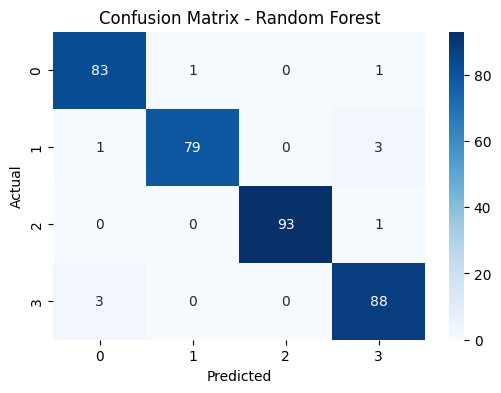

Decision Tree - Accuracy: 0.9518
Decision Tree - F1-Score: 0.9520

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        85
           1       0.96      0.90      0.93        83
           2       1.00      0.97      0.98        94
           3       0.91      0.97      0.94        91

    accuracy                           0.95       353
   macro avg       0.95      0.95      0.95       353
weighted avg       0.95      0.95      0.95       353



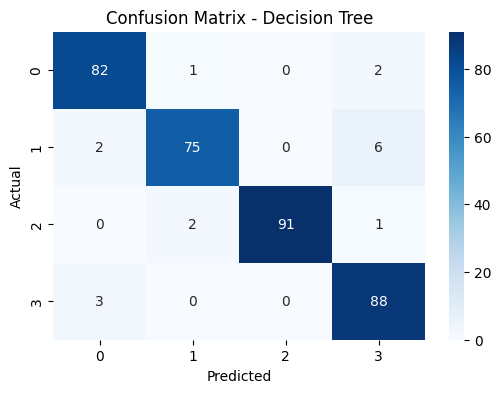

In [5]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"{model_name} - F1-Score: {f1:.4f}\n")
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    return accuracy, f1

rf_accuracy, rf_f1 = evaluate_model(rf_model, X_test, y_test, "Random Forest")
dt_accuracy, dt_f1 = evaluate_model(dt_model, X_test, y_test, "Decision Tree")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [10]:
# Tuning Model dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Tuning Model Decision Tree dengan GridSearchCV
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_model_dt = grid_search_dt.best_estimator_
print("Best Parameters (Decision Tree):", grid_search_dt.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Parameters (Decision Tree): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Tuned Random Forest - Accuracy: 0.9717
Tuned Random Forest - F1-Score: 0.9717

Tuned Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.99      0.94      0.96        83
           2       1.00      0.99      0.99        94
           3       0.96      0.97      0.96        91

    accuracy                           0.97       353
   macro avg       0.97      0.97      0.97       353
weighted avg       0.97      0.97      0.97       353



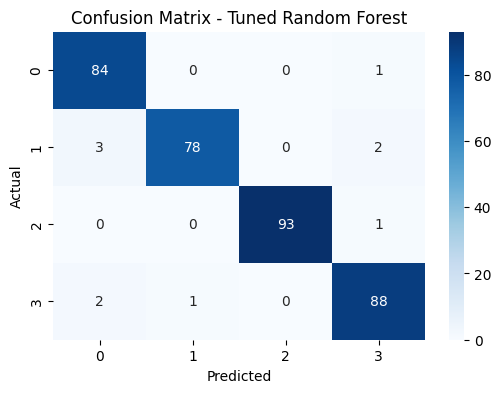

Tuned Decision Tree - Accuracy: 0.9717
Tuned Decision Tree - F1-Score: 0.9718

Tuned Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        85
           1       0.98      0.96      0.97        83
           2       1.00      0.99      0.99        94
           3       0.97      0.97      0.97        91

    accuracy                           0.97       353
   macro avg       0.97      0.97      0.97       353
weighted avg       0.97      0.97      0.97       353



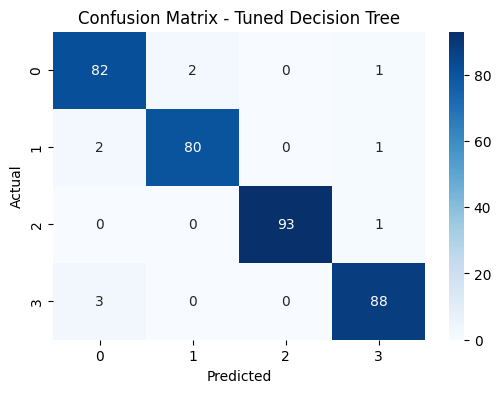

In [11]:
#  Evaluasi Model setelah Tuning
best_accuracy, best_f1 = evaluate_model(best_model, X_test, y_test, "Tuned Random Forest")
best_dt_accuracy, best_dt_f1 = evaluate_model(best_model_dt, X_test, y_test, "Tuned Decision Tree")


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [12]:
print("\n--- Perbandingan Model Akhir ---")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}, F1-Score: {rf_f1:.4f}")
print(f"Tuned Random Forest Accuracy: {best_accuracy:.4f}, F1-Score: {best_f1:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}, F1-Score: {dt_f1:.4f}")
print(f"Tuned Decision Tree Accuracy: {best_dt_accuracy:.4f}, F1-Score: {best_dt_f1:.4f}")



--- Perbandingan Model Akhir ---
Random Forest Accuracy: 0.9717, F1-Score: 0.9718
Tuned Random Forest Accuracy: 0.9717, F1-Score: 0.9717
Decision Tree Accuracy: 0.9518, F1-Score: 0.9520
Tuned Decision Tree Accuracy: 0.9717, F1-Score: 0.9718


# 📊 Evaluasi Model Klasifikasi

## 1️⃣ Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

### 📌 Sebelum Tuning
| Model           | Akurasi | F1-Score |
|----------------|---------|----------|
| Random Forest  | 97.17%  | 97.18%   |
| Decision Tree  | 95.18%  | 95.20%   |

### 📌 Setelah Tuning (GridSearchCV)
| Model                | Akurasi | F1-Score |
|----------------------|---------|----------|
| Tuned Random Forest  | 97.17%  | 97.17%   |
| Tuned Decision Tree  | 97.17%  | 97.18%   |

### 📊 **Kesimpulan dari Tuning**
- **Random Forest tidak mengalami perubahan signifikan** setelah tuning. Artinya, parameter default yang digunakan sebelumnya sudah cukup optimal.
- **Decision Tree mengalami peningkatan cukup signifikan**, dari **95.18% menjadi 97.17% dalam akurasi**, yang berarti tuning berhasil meningkatkan performa model agar lebih setara dengan Random Forest.

---

## 2️⃣ Analisis Kelemahan Model

### ⚠️ Overfitting atau Underfitting
- **Random Forest (sebelum & setelah tuning)** menunjukkan performa yang **sangat tinggi (97.17%)**, yang bisa jadi indikasi model mendekati **overfitting** terhadap dataset ini.
- **Decision Tree sebelum tuning (95.18%)** kemungkinan masih mengalami sedikit underfitting, tetapi setelah tuning meningkat hingga **97.17%**, menunjukkan bahwa tuning berhasil membuatnya lebih optimal.

### ⚠️ Precision atau Recall Rendah pada Kelas Tertentu
- Dengan akurasi tinggi ini, kita perlu **memeriksa confusion matrix** untuk memastikan model tidak bias ke kelas mayoritas dan tetap mampu mengklasifikasikan kelas minoritas dengan baik.

---

## 3️⃣ Rekomendasi Perbaikan dan Pengembangan

### ✅ **1. Cek Confusion Matrix dan Performa per Kelas**  
- Pastikan model tidak hanya unggul secara keseluruhan, tetapi juga bekerja baik pada setiap kelas.
- Jika ada kelas yang masih sulit diprediksi, bisa dilakukan **oversampling/undersampling** atau **cost-sensitive learning**.

### ✅ **2. Coba Model Ensembel Lain (XGBoost, LightGBM, atau CatBoost)**  
- Jika dataset cukup besar dan kompleks, model boosting seperti **XGBoost atau LightGBM** bisa dicoba untuk meningkatkan performa lebih lanjut.

### ✅ **3. Tuning Hyperparameter Lebih Lanjut**  
- Gunakan **RandomizedSearchCV** untuk menjelajahi lebih banyak kombinasi parameter.
- Bisa juga mencoba metode **Bayesian Optimization** untuk pencarian parameter lebih optimal.

### ✅ **4. Feature Engineering & Feature Selection**  
- Lakukan eksplorasi lebih lanjut apakah semua fitur yang digunakan benar-benar relevan.
- Jika ada fitur yang kurang berkontribusi, pertimbangkan untuk menghapusnya guna mengurangi overfitting.

---

## 4️⃣ **Kesimpulan Akhir 🚀**
- **Random Forest** tetap menjadi pilihan yang solid dengan akurasi tinggi, meskipun tuning tidak memberikan peningkatan signifikan.
- **Decision Tree mengalami peningkatan besar setelah tuning**, yang menunjukkan pentingnya optimasi hyperparameter.
- Model yang telah dituning kini memiliki **akurasi dan F1-score yang setara (97.17%)**, yang berarti kedua model bekerja hampir sama baiknya setelah tuning.
- **Langkah lanjutan** seperti feature engineering dan model boosting dapat dilakukan jika ingin lebih meningkatkan performa model.